<a href="https://colab.research.google.com/github/TheSpiralArchitect/Phase-1-/blob/main/Phase2_Social.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this in your new Colab notebook
!pip install --quiet pandas numpy matplotlib seaborn scipy

Saved synthetic symbolic stream to /content/drive/MyDrive/SRL_Phase2_Social/symbols/social_symbolic_stream.npy


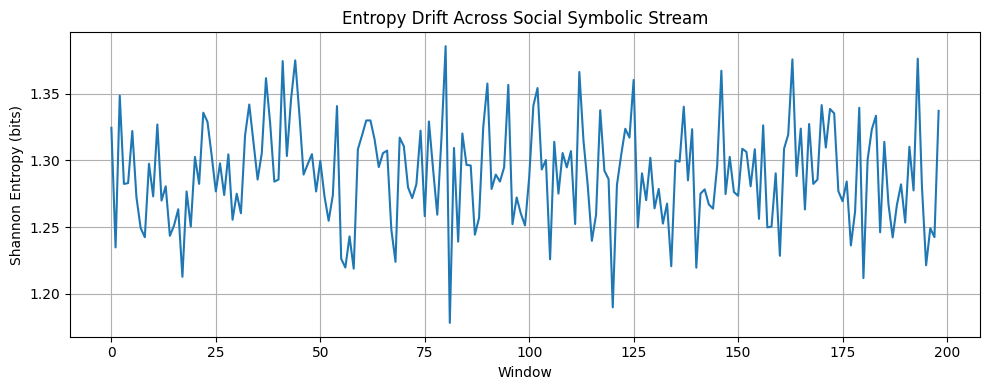

Lempel-Ziv Complexity (normalized): 0.99999


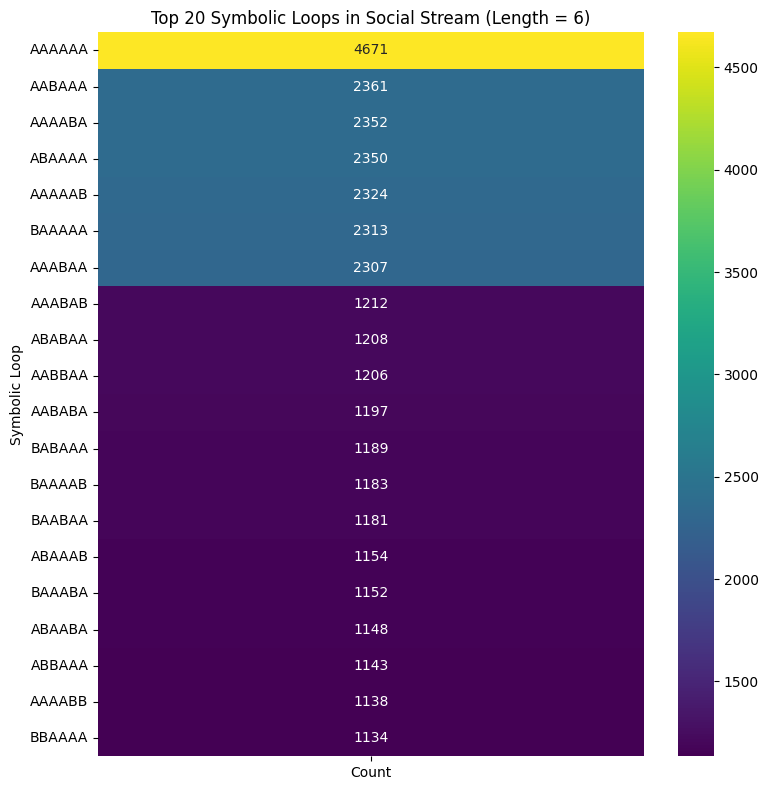

Entropy drift plot saved to: /content/drive/MyDrive/SRL_Phase2_Social/results/social_entropy_drift.png
Loop heatmap saved to: /content/drive/MyDrive/SRL_Phase2_Social/results/social_loop_heatmap.png


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from collections import Counter
import os

# Define paths
base_path = "/content/drive/MyDrive/SRL_Phase2_Social"
symbol_path = f"{base_path}/symbols/social_symbolic_stream.npy"
entropy_plot_path = f"{base_path}/results/social_entropy_drift.png"
heatmap_path = f"{base_path}/results/social_loop_heatmap.png"
os.makedirs(f"{base_path}/symbols", exist_ok=True)
os.makedirs(f"{base_path}/results", exist_ok=True)

# Step 1: Load synthetic symbolic stream (or replace with real)
# Simulate a symbolic stream with similar properties to SRL
np.random.seed(42)
symbols = np.random.choice(["A", "B", "H"], size=100000, p=[0.6, 0.3, 0.1])
symbol_array = np.array(symbols)
np.save(symbol_path, symbol_array)
print(f"Saved synthetic symbolic stream to {symbol_path}")

# Step 2: Entropy drift calculation
window_size = 500
entropies = []
for i in range(0, len(symbol_array) - window_size, window_size):
    window = symbol_array[i:i + window_size]
    counts = pd.Series(window).value_counts()
    probs = counts / counts.sum()
    entropies.append(entropy(probs, base=2))

plt.figure(figsize=(10, 4))
plt.plot(entropies)
plt.title("Entropy Drift Across Social Symbolic Stream")
plt.xlabel("Window")
plt.ylabel("Shannon Entropy (bits)")
plt.grid(True)
plt.tight_layout()
plt.savefig(entropy_plot_path)
plt.show()

# Step 3: Lempel-Ziv Complexity
def lz_complexity(s):
    i, k, l = 0, 1, 1
    complexity = 1
    while True:
        if s[i:i+l] == s[k:k+l]:
            l += 1
            if k + l > len(s):
                break
        else:
            complexity += 1
            i = k
            k += 1
            l = 1
        if k >= len(s):
            break
    return complexity / len(s)

symbol_str = ''.join(symbol_array)
lz_score = lz_complexity(symbol_str)
print(f"Lempel-Ziv Complexity (normalized): {lz_score:.5f}")

# Step 4: Loop motif detection (length = 6)
loop_length = 6
all_loops = [symbol_str[i:i+loop_length] for i in range(len(symbol_str)-loop_length)]
loop_counts = Counter(all_loops)
top_loops = loop_counts.most_common(20)

# Heatmap of top loops
motifs = [loop for loop, _ in top_loops]
counts = [count for _, count in top_loops]
heat_data = np.array(counts).reshape(-1, 1)

plt.figure(figsize=(8, 8))
sns.heatmap(heat_data, annot=True, fmt="d", cmap="viridis",
            yticklabels=motifs, xticklabels=["Count"])
plt.title("Top 20 Symbolic Loops in Social Stream (Length = 6)")
plt.ylabel("Symbolic Loop")
plt.tight_layout()
plt.savefig(heatmap_path)
plt.show()

print(f"Entropy drift plot saved to: {entropy_plot_path}")
print(f"Loop heatmap saved to: {heatmap_path}")